In [105]:
import pandas as pd
import numpy as np
import time

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler  # doctest: +SKIP
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import GaussianRandomProjection

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
from silhouette import silhouette
import matplotlib.cm as cm
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from scipy.stats import norm, kurtosis



%matplotlib inline


In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
wine_X = df.drop('quality',axis=1)
wine_y = df.quality


In [3]:
X_stan = StandardScaler().fit_transform(wine_X)
y = wine_y.copy()


## Clustering

### EM

In [7]:
from sklearn.mixture import GaussianMixture
co_type = ['full','diag','tied','spherical']
gm_co_scores = []
aics = []
for t in co_type:
    gm = GaussianMixture(n_components=6, random_state=10,covariance_type=t)
    gm_co = gm.fit_predict(X_stan)
    gm_co_scores.append(silhouette_score(X_stan,gm_co))
    aics.append(gm.aic(X_stan))

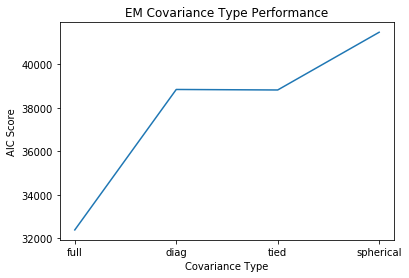

In [8]:
plt.title('EM Covariance Type Performance')
plt.xlabel('Covariance Type')
plt.ylabel('AIC Score')
plt.xticks(range(4),co_type)
#plt.plot(gm_co_scores)
plt.plot(aics)

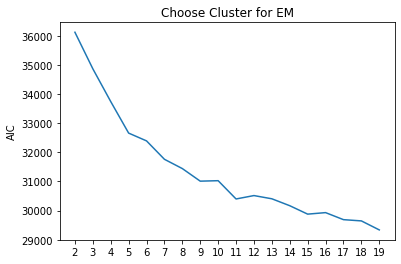

In [18]:
import time

d = X_stan

start = time.time()
ks = [2,4,6,8,10]
ks = range(2,20)
total = []
scores = []
for k in ks:
    #print(k)
    gms = GaussianMixture(n_components=k, random_state=10)
    gms.fit(d)
    total.append(gms.aic(d))
    cluster_labels = gms.fit_predict(d)
    scores.append(silhouette_score(d, cluster_labels))

    #print(time.time()-start)
plt.xticks(range(len(ks)), ks)
plt.title('Choose Cluster for EM')
plt.ylabel('AIC')
plt.plot(total)

### Kmeans

In [19]:
from scipy.spatial.distance import cdist 
K = [2,5,10,20,30,50,100]
def kmeans_elbow(K,X_stan,seed=0):
    distortions = [] 
    inertias = [] 
    silhouette_avg = []
    mapping1 = {} 
    mapping2 = {} 

    for k in K: 
        #Building and fitting the model 
        kmeanModel = KMeans(n_clusters=k,random_state=seed).fit(X_stan) 
        #kmeanModel.fit(X_stan)     

        distortions.append(sum(np.min(cdist(X_stan, kmeanModel.cluster_centers_, 
                          'euclidean'),axis=1)) / X_stan.shape[0]) 
        inertias.append(kmeanModel.inertia_) 
        silhouette_avg.append(silhouette_score(X_stan, kmeanModel.predict(X_stan)))

#         mapping1[k] = sum(np.min(cdist(X_stan, kmeanModel.cluster_centers_, 
#                      'euclidean'),axis=1)) / X_stan.shape[0] 
#         mapping2[k] = kmeanModel.inertia_
    return silhouette_avg,distortions,inertias

In [20]:
K = [2,4,6,8,10]
K = range(2,20)
sih,distortions,inertias = kmeans_elbow(K,X_stan,seed = 10)

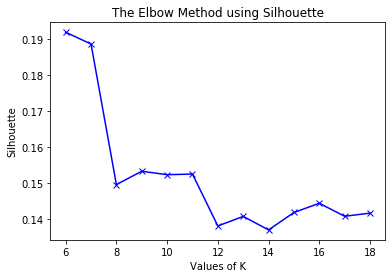

In [30]:

plt.plot(K[4:-1], sih[4:-1], 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Silhouette') 
plt.title('The Elbow Method using Silhouette') 
plt.show()

In [28]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

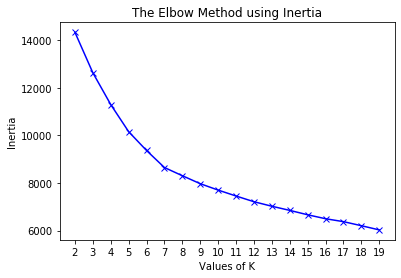

In [26]:
plt.plot(inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.xticks(range(len(ks)), ks)

plt.title('The Elbow Method using Inertia') 
plt.show()

In [32]:
wine_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


For n_clusters = 6 The average silhouette_score is : 0.19201110360714535
For n_clusters = 7 The average silhouette_score is : 0.18872555305539634
For n_clusters = 8 The average silhouette_score is : 0.14953069513633138
For n_clusters = 9 The average silhouette_score is : 0.1532435590265896
For n_clusters = 10 The average silhouette_score is : 0.15229148009965013


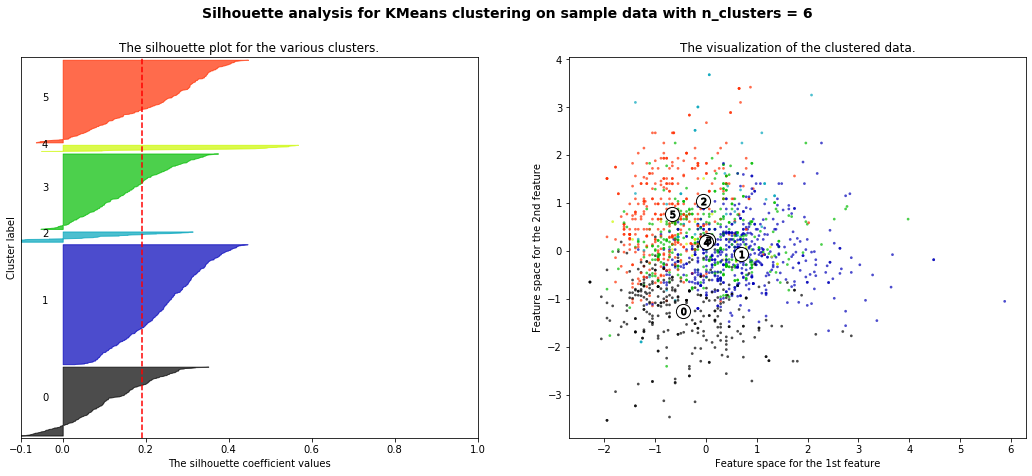

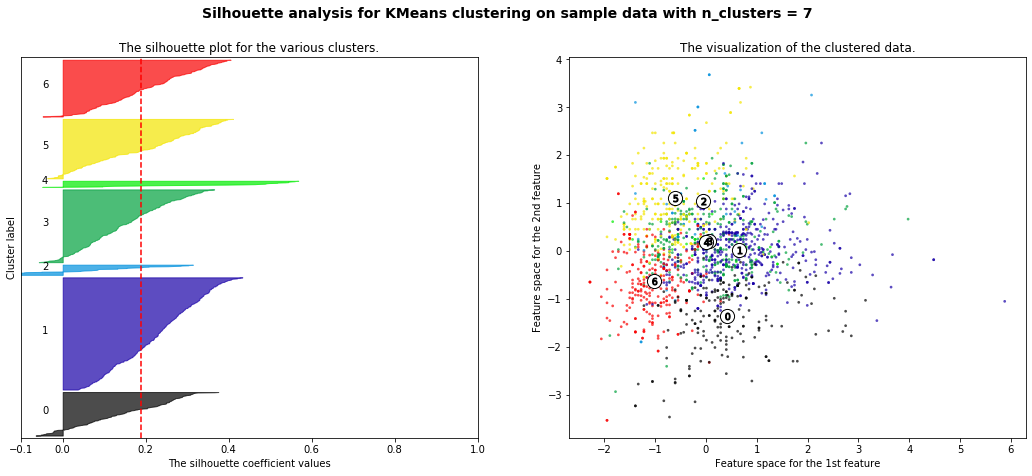

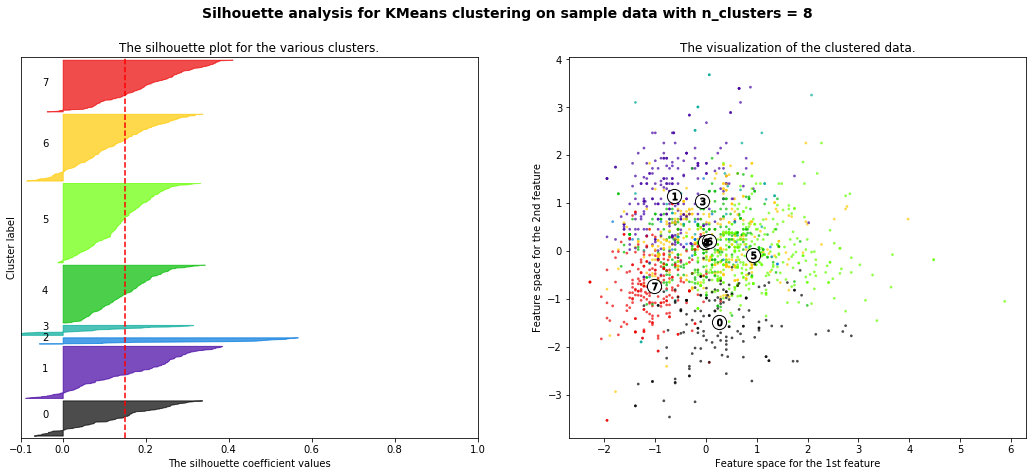

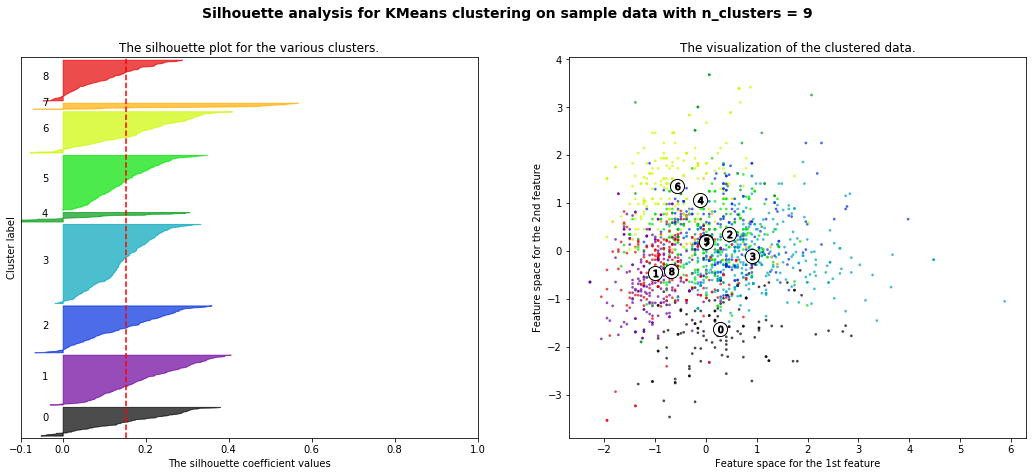

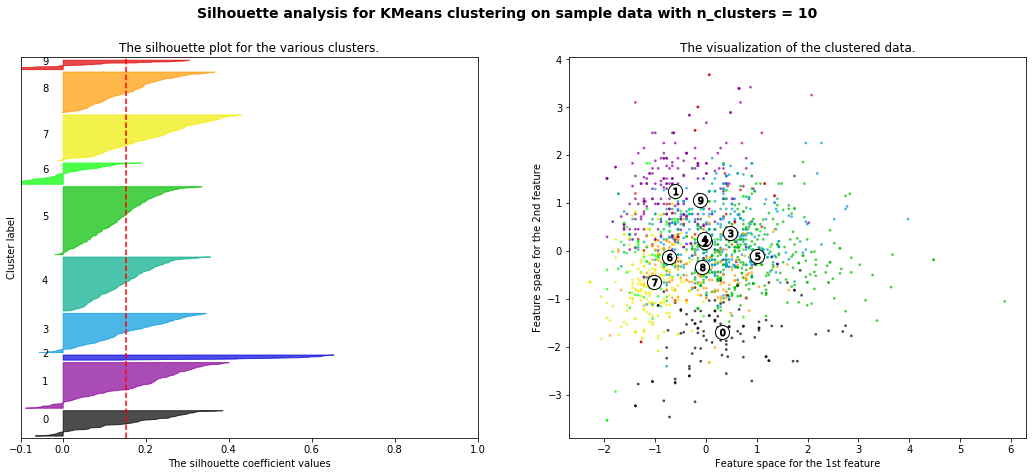

In [4]:
silhouette(X_stan,range_n_clusters=[6,7,8,9,10],columns=[1,7])

For n_clusters = 6 The average silhouette_score is : 0.19201110360714535
For n_clusters = 7 The average silhouette_score is : 0.18872555305539634
For n_clusters = 8 The average silhouette_score is : 0.14953069513633138
For n_clusters = 9 The average silhouette_score is : 0.1532435590265896
For n_clusters = 10 The average silhouette_score is : 0.15229148009965013


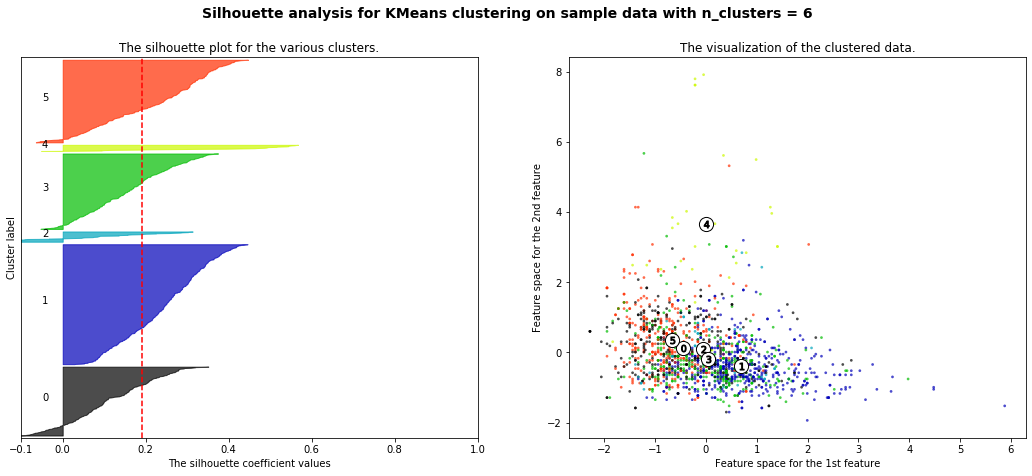

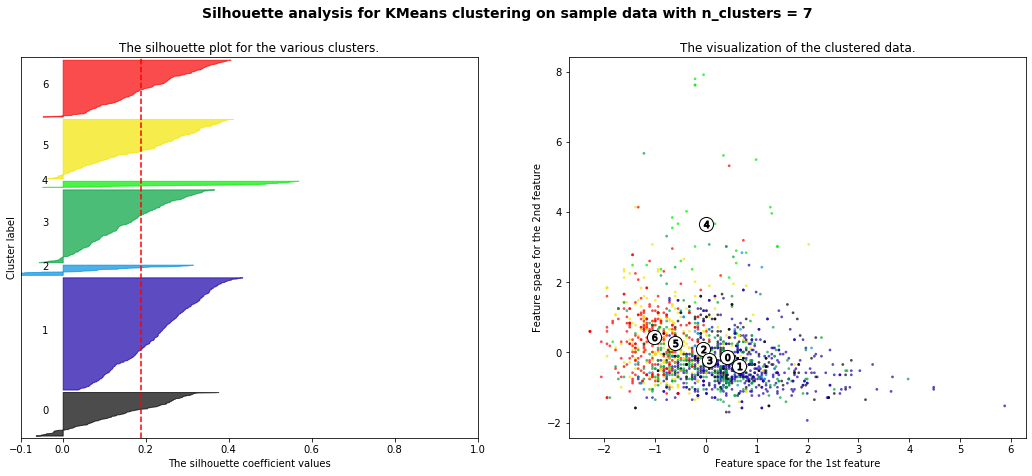

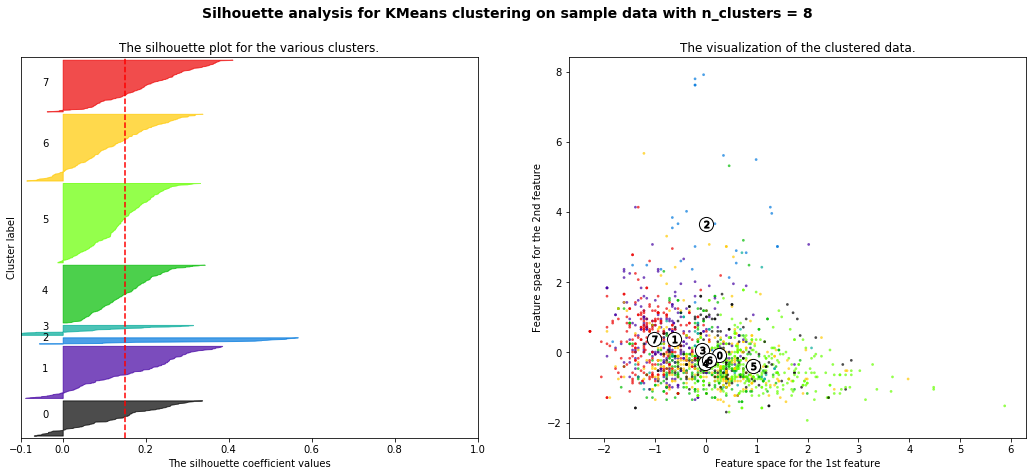

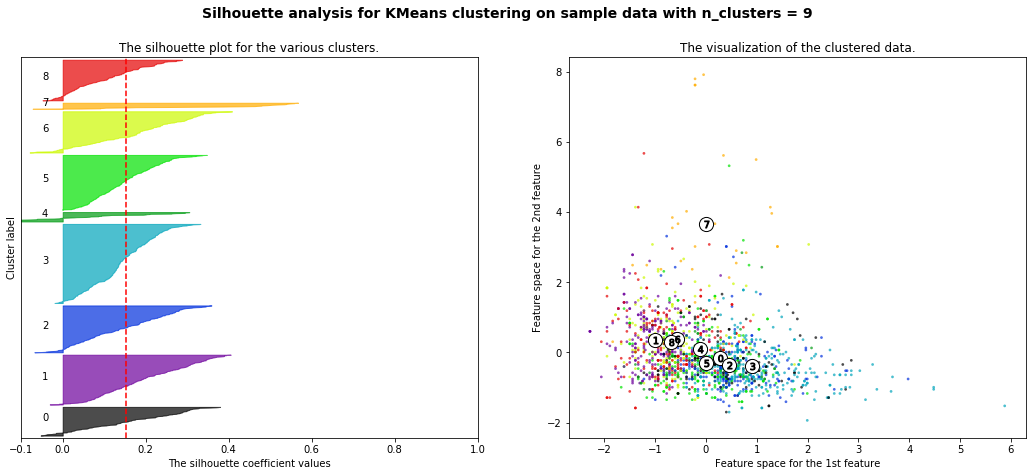

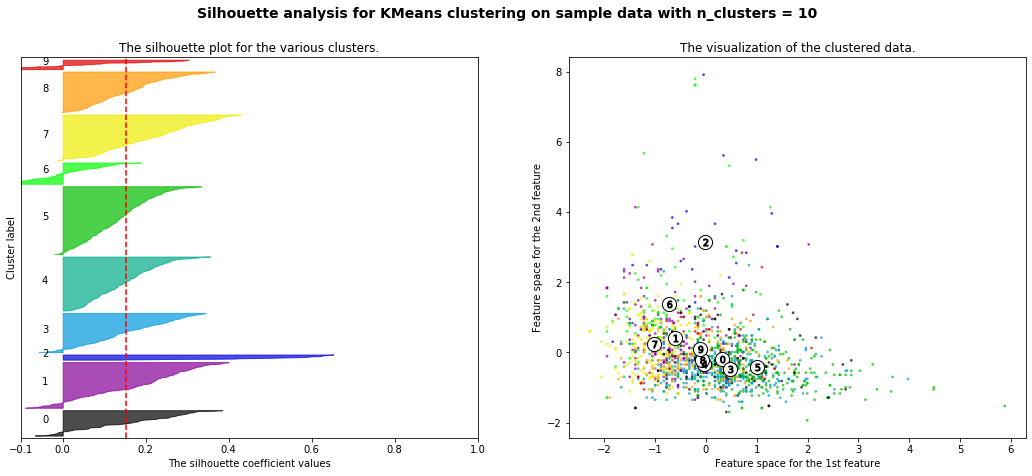

In [5]:
silhouette(X_stan,range_n_clusters=[6,7,8,9,10],columns=[1,-2])

In [19]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans_label = kmeans.fit_predict(X_stan)
gm = GaussianMixture(n_components=6, random_state=0)
gm_label = gm.fit_predict(X_stan)

In [21]:
max(gm_label)

5

In [16]:
from sklearn.metrics.cluster import v_measure_score
print(v_measure_score(gm_label,y),
adjusted_mutual_info_score(kmeans_label,y))

0.0824774826747775 0.08415782323084611


In [17]:
rr = pd.DataFrame(np.stack((y.to_numpy(),kmeans_label,gm_label)).T,columns = ['label','kmeans','EM'])
rr.head()

,label,kmeans,EM
0,5,4,0
1,5,4,0
2,5,4,0
3,6,3,2
4,5,4,0


In [25]:
emdf = []
for i in range(6):
    emdf.append(rr[rr.EM==i].label.value_counts())
emdf = pd.DataFrame(emdf,index=range(6)).T
emdf

,0,1,2,3,4,5
3,NaN,3.0,1.0,3.0,3.0,NaN
4,16.0,4.0,5.0,8.0,16.0,4.0
5,302.0,50.0,119.0,73.0,114.0,23.0
6,120.0,27.0,225.0,44.0,169.0,53.0
7,4.0,3.0,109.0,16.0,32.0,35.0
8,NaN,NaN,11.0,NaN,4.0,3.0


In [27]:
kmeans_df = []
for i in range(6):
    kmeans_df.append(rr[rr.kmeans==i].label.value_counts())
kmeans_df = pd.DataFrame(kmeans_df,index=range(6)).T
#kmeans_df.index = ['Kmeans0','Kmeans1']
kmeans_df

,0,1,2,3,4,5
3,NaN,1.0,NaN,2.0,7.0,NaN
4,4.0,8.0,1.0,4.0,35.0,1.0
5,40.0,228.0,17.0,98.0,282.0,16.0
6,158.0,100.0,9.0,174.0,185.0,12.0
7,82.0,13.0,1.0,77.0,21.0,5.0
8,10.0,1.0,NaN,7.0,NaN,NaN


In [35]:
pd.concat([emdf.fillna(0),kmeans_df.fillna(0)],axis=1).to_csv('wineclustering.csv')

In [36]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Feature Reduction

### PCA

In [37]:
pca = PCA(random_state=0)
pca.fit(X_stan)

PCA(random_state=0)

In [38]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

In [79]:
pca.explained_variance_ratio_[:5
                             ].sum()

0.7952827473610352

In [82]:
pca = PCA(n_components=6,random_state=0)
pca.fit(X_stan)
pca_X =pca.transform(X_stan)

In [43]:
import seaborn as sns

def plot_pca(vector_num,top_comp):
    v_1 = pca.components_[vector_num]
    comps = pd.DataFrame(list(zip(v_1, wine_X.columns.values)), 
                             columns=['weights', 'features'])
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(top_comp)
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(vector_num))
    plt.show()

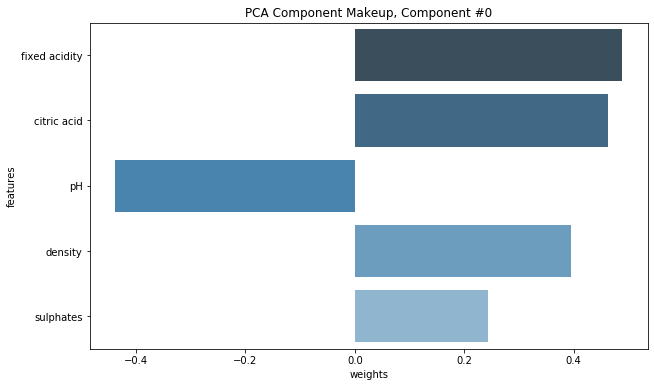

In [63]:
plot_pca(0,5)

###  ICA

In [47]:
ks = [1,2,3,4,5,6,7,8,9,10]#,20,40]
def find_ica(ks,X_stan):
    results = []
    for k in ks:
        transformerlarge = FastICA(n_components=k,
                random_state=0)
        X_transformed_large = transformerlarge.fit_transform(X_stan)
        results.append(kurtosis(X_transformed_large))#.mean()
    return results

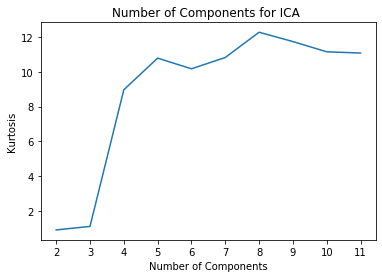

In [53]:
ks = range(2,12)
results = find_ica(ks,X_stan)
rs = []
for r in results:
    rs.append(r.mean())
plt.title('Number of Components for ICA ')
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')
plt.xticks(range(10),ks)
plt.plot(rs)

In [55]:
        transformerlarge = FastICA(n_components=8,
                random_state=0)
        X_transformed_large = transformerlarge.fit_transform(X_stan)

In [60]:
import seaborn as sns

def plot_ica(vector_num,top_comp,transformerlarge=transformerlarge):
    v_1 = transformerlarge.components_[vector_num]
    comps = pd.DataFrame(list(zip(v_1, wine_X.columns.values)), 
                             columns=['weights', 'features'])
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(top_comp)
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("ICA Component Makeup, Component #" + str(vector_num))
    plt.show()

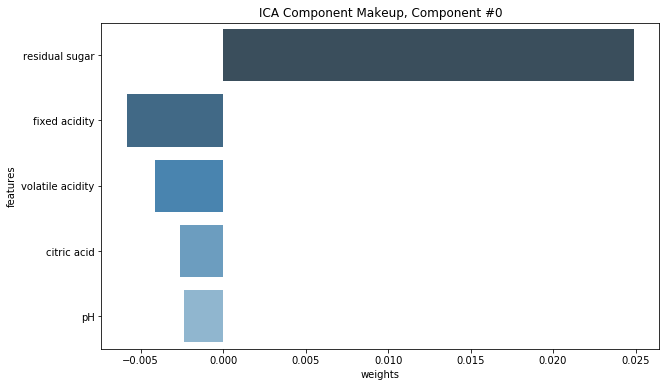

In [61]:
plot_ica(0,5)

In [83]:
ica_X = transformerlarge.transform(X_stan)

In [84]:
ica_X.shape

(1599, 8)

In [64]:
wine_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## RP

In [73]:
ks = [10,20,30,35,45,50,59]#,20,40]
ks = range(2,11)
#ks = [5]
def find_rand_proj(ks=ks,X_stan=X_stan):
    results = []
    for k in ks:
        error = 0
        for i in range(5):
            gauRP = GaussianRandomProjection(random_state=i,n_components=k)
            #SRRp = SparseRandomProjection(random_state=rng,n_components=5)

            gau = gauRP.fit_transform(X_stan)
            
            X_transformed_large = gauRP.fit_transform(X_stan)
            error += mean_squared_error(np.dot(gau,gauRP.components_), X_stan)
        results.append(error/k)
    return results

In [76]:
randp_result = find_rand_proj()

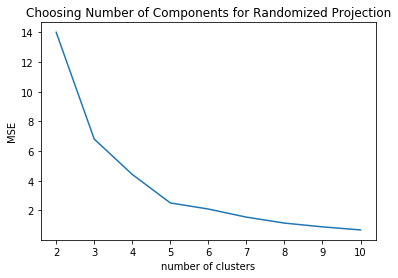

In [77]:
plt.title('Choosing Number of Components for Randomized Projection')
plt.xlabel('number of clusters')
plt.ylabel('MSE')
plt.xticks(range(len(ks)),ks)
plt.plot(randp_result)

In [85]:
gauRP = GaussianRandomProjection(random_state=0,n_components=8)
rp_X = gauRP.fit_transform(X_stan)

### Tree

In [86]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_stan, y)


RandomForestClassifier(random_state=42)

In [98]:
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_importance_sorted_idx
clf.feature_importances_[tree_importance_sorted_idx[-7:]]

array([0.07553452, 0.07853509, 0.08890462, 0.10060621, 0.10372226,
       0.11240187, 0.1516983 ])

In [100]:
X = wine_X.copy()

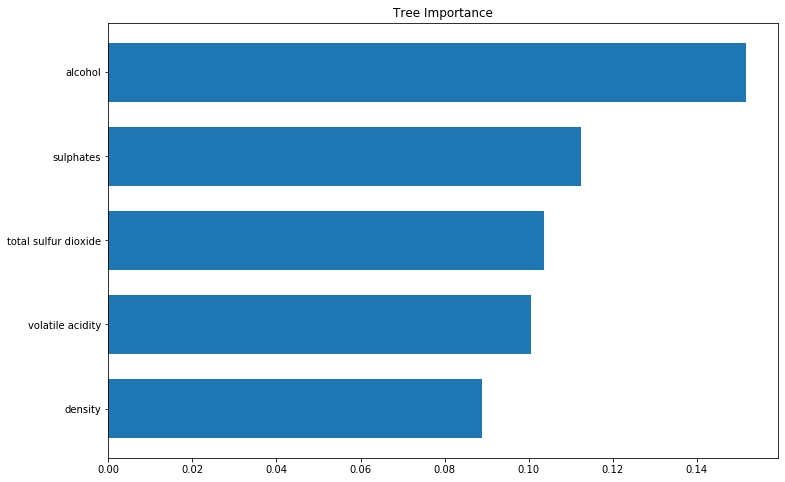

In [101]:
# result = permutation_importance(clf, X_stan, y, n_repeats=1,
#                                 random_state=42)
# perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

ax1.barh(tree_indices[-5:],
         clf.feature_importances_[tree_importance_sorted_idx[-5:]], height=0.7)
ax1.set_yticklabels(X.columns[tree_importance_sorted_idx][-5:])
ax1.set_yticks(tree_indices[-5:])
#ax1.set_ylim((0, len(clf.feature_importances_)))
# ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
#             labels=X.feature_names[perm_sorted_idx])
#fig.tight_layout()
plt.title('Tree Importance')
plt.show()

In [110]:
tree_X = X_stan[:,tree_importance_sorted_idx[-5:]]

In [111]:
X.columns[tree_importance_sorted_idx[-5:]]

Index(['density', 'volatile acidity', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')

In [106]:
#start = time.time()

transformer = FastICA(n_components=10,
        random_state=0)
pca = PCA(n_components=10,random_state=0)
gauRP = GaussianRandomProjection(random_state=0,n_components=10)
t0 = time.time()
gauRP.fit_transform(X_stan)
t1 = time.time()#-start
transformer.fit_transform(X_stan)
t2 = time.time()#-t1
pca.fit_transform(X_stan)
t3 = time.time()#-t2
print(t1-t0,t2-t1,t3-t2)

0.0010008811950683594 0.017998218536376953 0.0010023117065429688


For n_clusters = 6 The average silhouette_score is : 0.1492263380666777
For n_clusters = 8 The average silhouette_score is : 0.1342958124585806
For n_clusters = 10 The average silhouette_score is : 0.14960508235673523


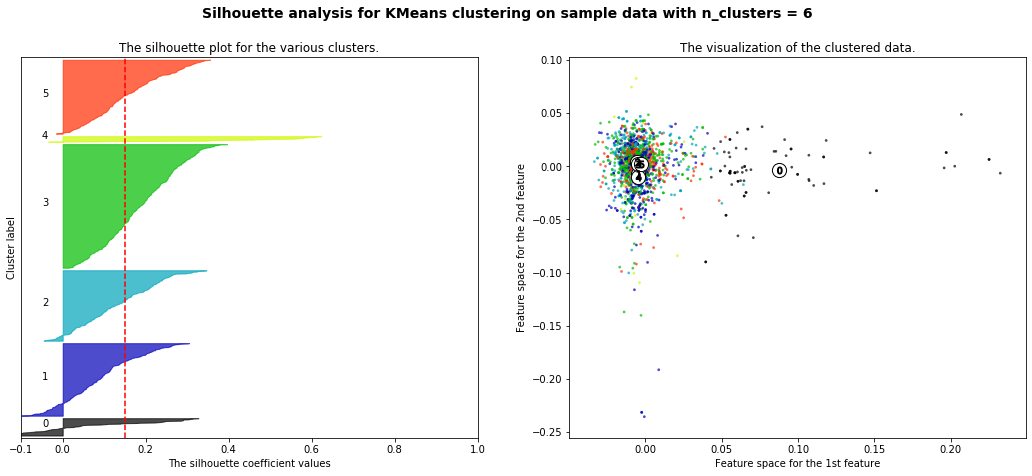

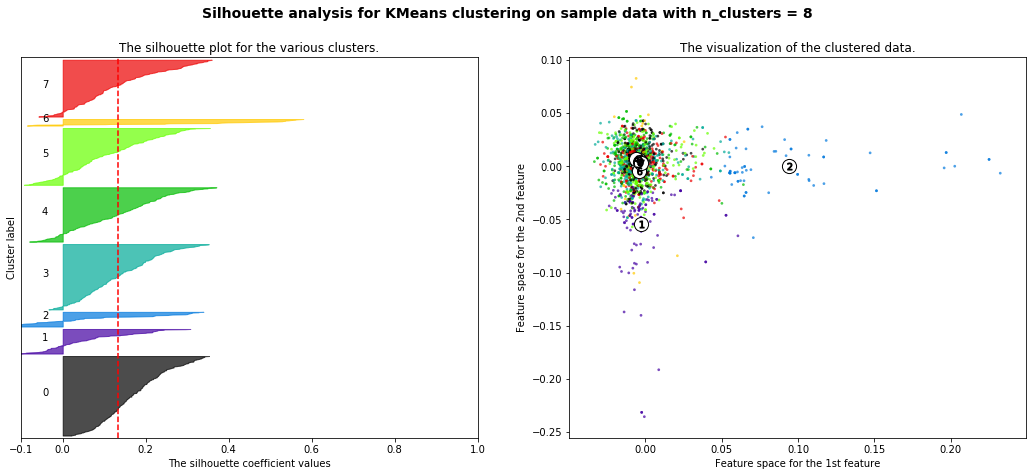

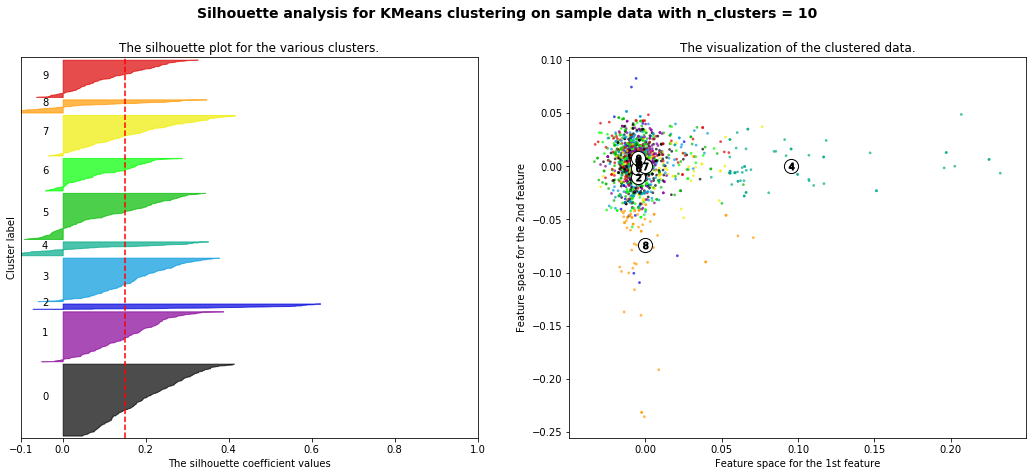

In [107]:
silhouette(ica_X,range_n_clusters=[6,8,10])

For n_clusters = 6 The average silhouette_score is : 0.23153617613934216
For n_clusters = 8 The average silhouette_score is : 0.1910586392778268
For n_clusters = 10 The average silhouette_score is : 0.18882248864622966


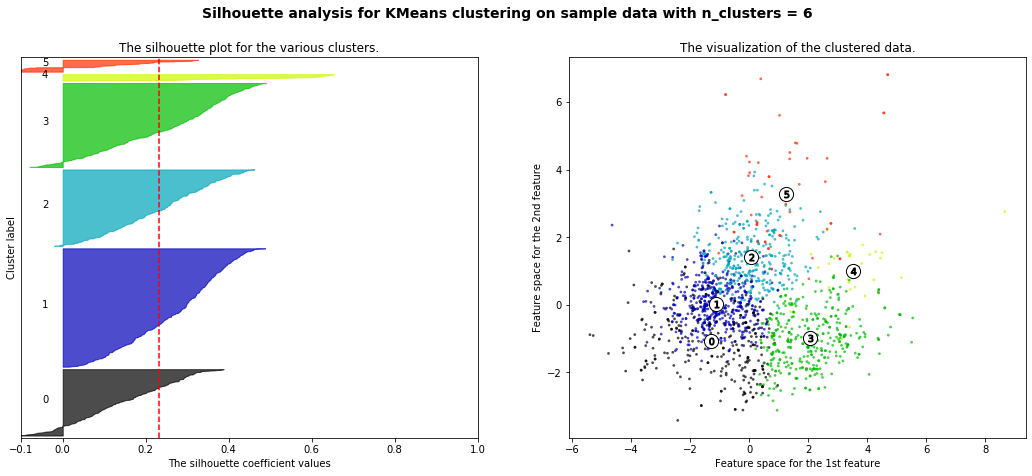

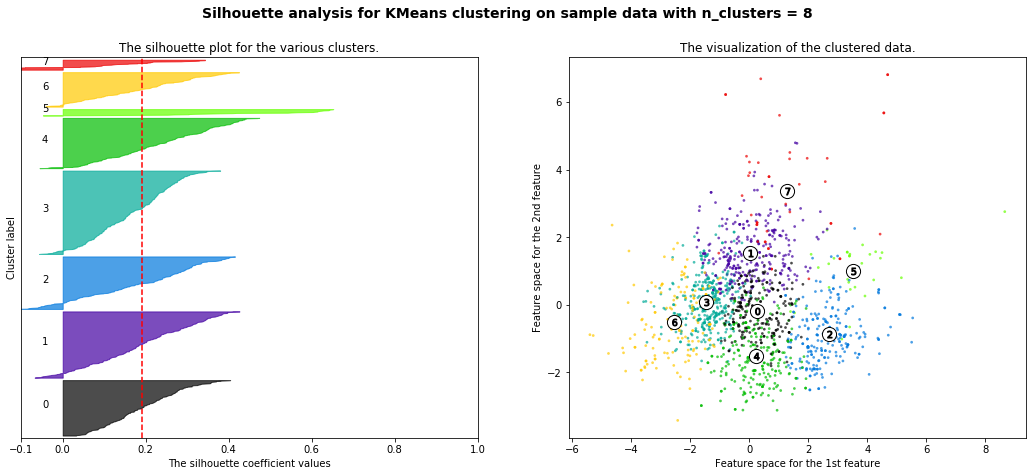

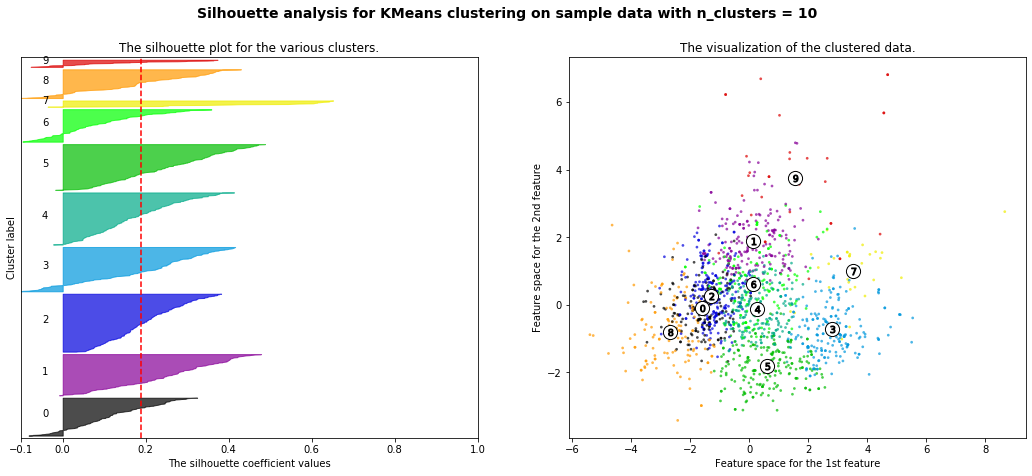

In [108]:
silhouette(pca_X,range_n_clusters=[6,8,10])

In [125]:
n_comp = [6,6,6,6,6]
combined_data = [ica_X,pca_X,rp_X,tree_X,X_stan]

In [115]:
labels_rp = []
for i in range(5):
    gauRP = GaussianRandomProjection(random_state=i,n_components=8)
    multi_rp_X = gauRP.fit_transform(X_stan)
    gm = GaussianMixture(n_components=6, random_state=0)
    kmeans = KMeans(n_clusters=6, random_state=0)
    labels_rp.append(gm.fit_predict(multi_rp_X))
    labels_rp.append(kmeans.fit_predict(multi_rp_X))
multi_rp_label = pd.DataFrame(np.array(labels_rp).T)#.head()
order_by_count = []
for i in multi_rp_label.columns:
    order_by_count.append(multi_rp_label[i].value_counts())


In [117]:
pd.DataFrame(np.array(order_by_count).T)

,0,1,2,3,4,5,6,7,8,9
0,481,502,370,460,512,530,577,460,473,450
1,426,468,347,401,449,352,487,419,435,391
2,351,290,319,381,330,260,252,394,403,344
3,153,257,278,291,161,215,118,236,188,310
4,108,55,194,34,89,213,89,67,57,69
5,80,27,91,32,58,29,76,23,43,35


Text(0.5, 0, 'Largest 5 Clusters')

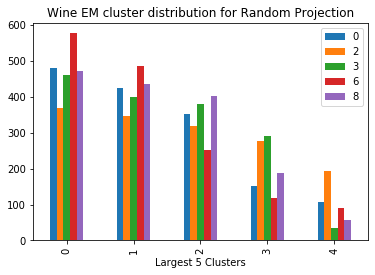

In [119]:
ax = pd.DataFrame(np.array(order_by_count).T).iloc[:5,[0,2,3,6,8]].plot.bar(
    title='Wine EM cluster distribution for Random Projection')
ax.set_xlabel('Largest 5 Clusters')

Text(0.5, 0, 'Largest 5 Clusters')

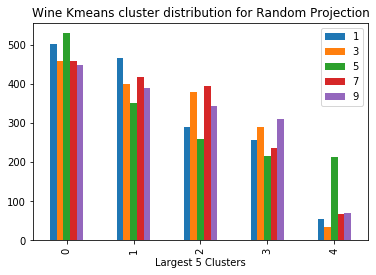

In [120]:
ax = pd.DataFrame(np.array(order_by_count).T).iloc[:5,[1,3,5,7,9]].plot.bar(
    title='Wine Kmeans cluster distribution for Random Projection')
ax.set_xlabel('Largest 5 Clusters')

In [126]:
labels = []
for i in range(5):
    gm = GaussianMixture(n_components=n_comp[i], random_state=0)
    kmeans = KMeans(n_clusters=n_comp[i], random_state=0)
    labels.append(gm.fit_predict(combined_data[i]))
    labels.append(kmeans.fit_predict(combined_data[i]))


In [132]:
aa = pd.DataFrame(np.array(labels).T)
aa.columns = ['ica_gm','ica_kmeans','pca_gm','pca_means','rp_gm','rp_kmeans','tree_gm','tree_kmeans','ori_gm','ori_kmeans']

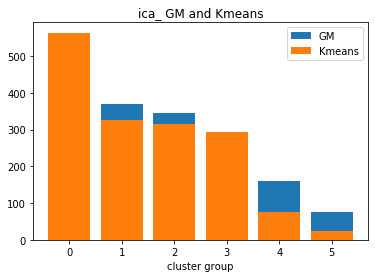

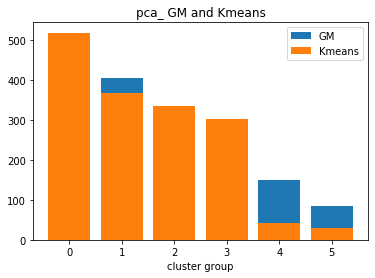

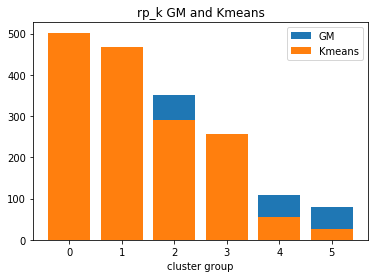

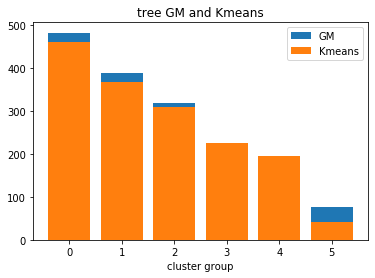

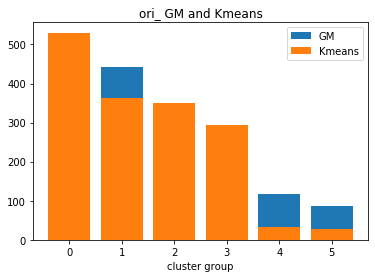

In [133]:
#fig, (ax1, ax2) = plt.subplots(1, 2)
combined_sort_label = []
columns = aa.columns
i = 0
for col in columns:
    i+=1
    bar_x = range(max(aa[col])+1)
    bar_y = aa[col].value_counts().to_numpy()
    combined_sort_label.append(bar_y)
    plt.bar(bar_x, bar_y)
    #plt.xticks(range(max(aa[col])+1),aa[col].value_counts().index)
    if i==2:
        i=0
        plt.title(col[:4]+' GM and Kmeans')
        plt.xlabel('cluster group')
        plt.legend(('GM', 'Kmeans'))

        plt.show()

In [134]:
start = time.time()
sil_score = []
cd = [ica_X,ica_X,pca_X,pca_X,rp_X,rp_X,tree_X,tree_X,X_stan,X_stan]
for i in range(10):
    print(i,time.time()-start)
    data = cd[i]
    sil_score.append(silhouette_score(data,labels[i]))

0 0.0
1 0.07500338554382324
2 0.13199853897094727
3 0.17300105094909668
4 0.21599984169006348
5 0.26200056076049805
6 0.30300211906433105
7 0.3399977684020996
8 0.3749980926513672
9 0.41899967193603516
